# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [3]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [5]:
y.value_counts()

1    71
0    59
2    48
dtype: int64

In [6]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [7]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_w = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_w.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
kmeans=KMeans(n_clusters=8)

In [10]:
clusters=kmeans.fit(X_w)

In [11]:
clusters

KMeans()

In [12]:
len(clusters.cluster_centers_)

8

In [13]:
y_pred = kmeans.predict(X_w)
y_pred

array([4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 0, 4, 4, 3, 4, 3,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 0, 5, 5, 0, 3, 5, 3,
       0, 0, 5, 6, 5, 2, 0, 2, 3, 0, 0, 5, 6, 3, 0, 0, 5, 1, 3, 0, 5, 5,
       5, 5, 5, 5, 5, 3, 3, 6, 7, 0, 3, 3, 0, 0, 3, 0, 0, 5, 0, 5, 0, 3,
       3, 3, 5, 5, 5, 5, 0, 3, 7, 3, 3, 2, 3, 3, 3, 3, 3, 5, 3, 3, 7, 7,
       7, 7, 5, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 7, 1, 7, 1,
       1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 1, 1, 1, 1, 1, 7, 7, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
sil = metrics.silhouette_score(X_w, y_pred)
sil

0.14616506979101776

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [15]:
kmeans2=KMeans(n_clusters=5)

In [16]:
clusters2=kmeans2.fit(X_w)

In [17]:
y_pred2 = clusters2.predict(X_w)
y_pred2

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 0, 0, 3, 4,
       0, 0, 3, 0, 3, 4, 3, 4, 0, 0, 0, 3, 0, 4, 0, 0, 3, 2, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 4,
       0, 0, 3, 3, 3, 3, 0, 0, 2, 0, 0, 4, 3, 0, 0, 0, 0, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [18]:
sil2 = metrics.silhouette_score(X_w, y_pred2)
sil2

0.19984376895284467

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [19]:
kmeans3=KMeans(n_clusters=3)

In [20]:
clusters3=kmeans3.fit(X_w)

In [21]:
y_pred3 = clusters3.predict(X_w)
y_pred3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
sil3 = metrics.silhouette_score(X_w, y_pred3)
sil3


0.2848589191898987

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [23]:
kmeans = [KMeans(n_clusters=i) for i in range (1,21)]
for model in kmeans:
    model.fit(X_w)

In [24]:
inertias = [model.inertia_ for model in kmeans]
print(inertias)

[2313.999999999999, 1659.0079672511504, 1277.928488844643, 1180.1665831581074, 1105.518554042544, 1040.43914793289, 1003.7814005065021, 947.8789298487576, 891.4791552254367, 852.3665162243024, 809.3603104556936, 798.1730873488907, 766.2695527446647, 747.2066681968558, 718.5028723285534, 697.7970334958528, 671.227473139208, 666.5503135427382, 643.4051128379459, 632.5368788006297]


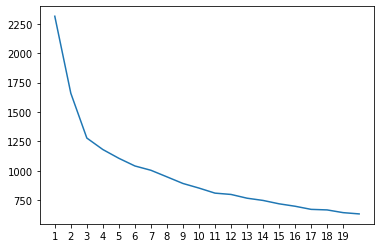

In [25]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,20));

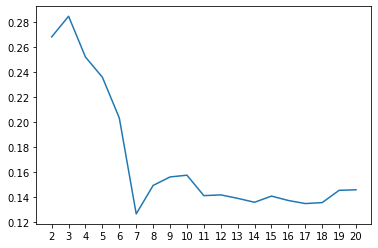

In [26]:
sil = [silhouette_score(X_w,model.labels_) for model in kmeans[1:]]
plt.plot(range(2,21),sil)
plt.xticks(range(2,21));

## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [27]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [28]:
model = AgglomerativeClustering()

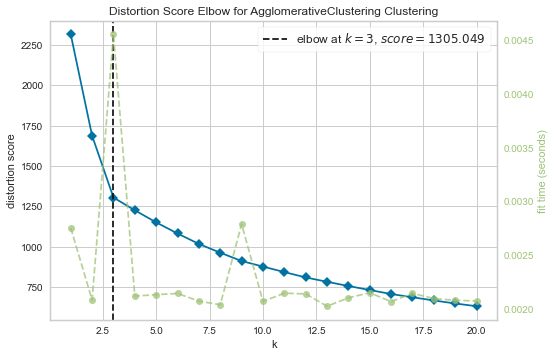

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
visualizer = KElbowVisualizer(model, k=(1,21))
visualizer.fit(X_w)
visualizer.show()

3 is the best number of clusters

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [30]:
model = KMeans(n_clusters=3)

In [32]:
X_w['cluster']  = model.fit(X_w)

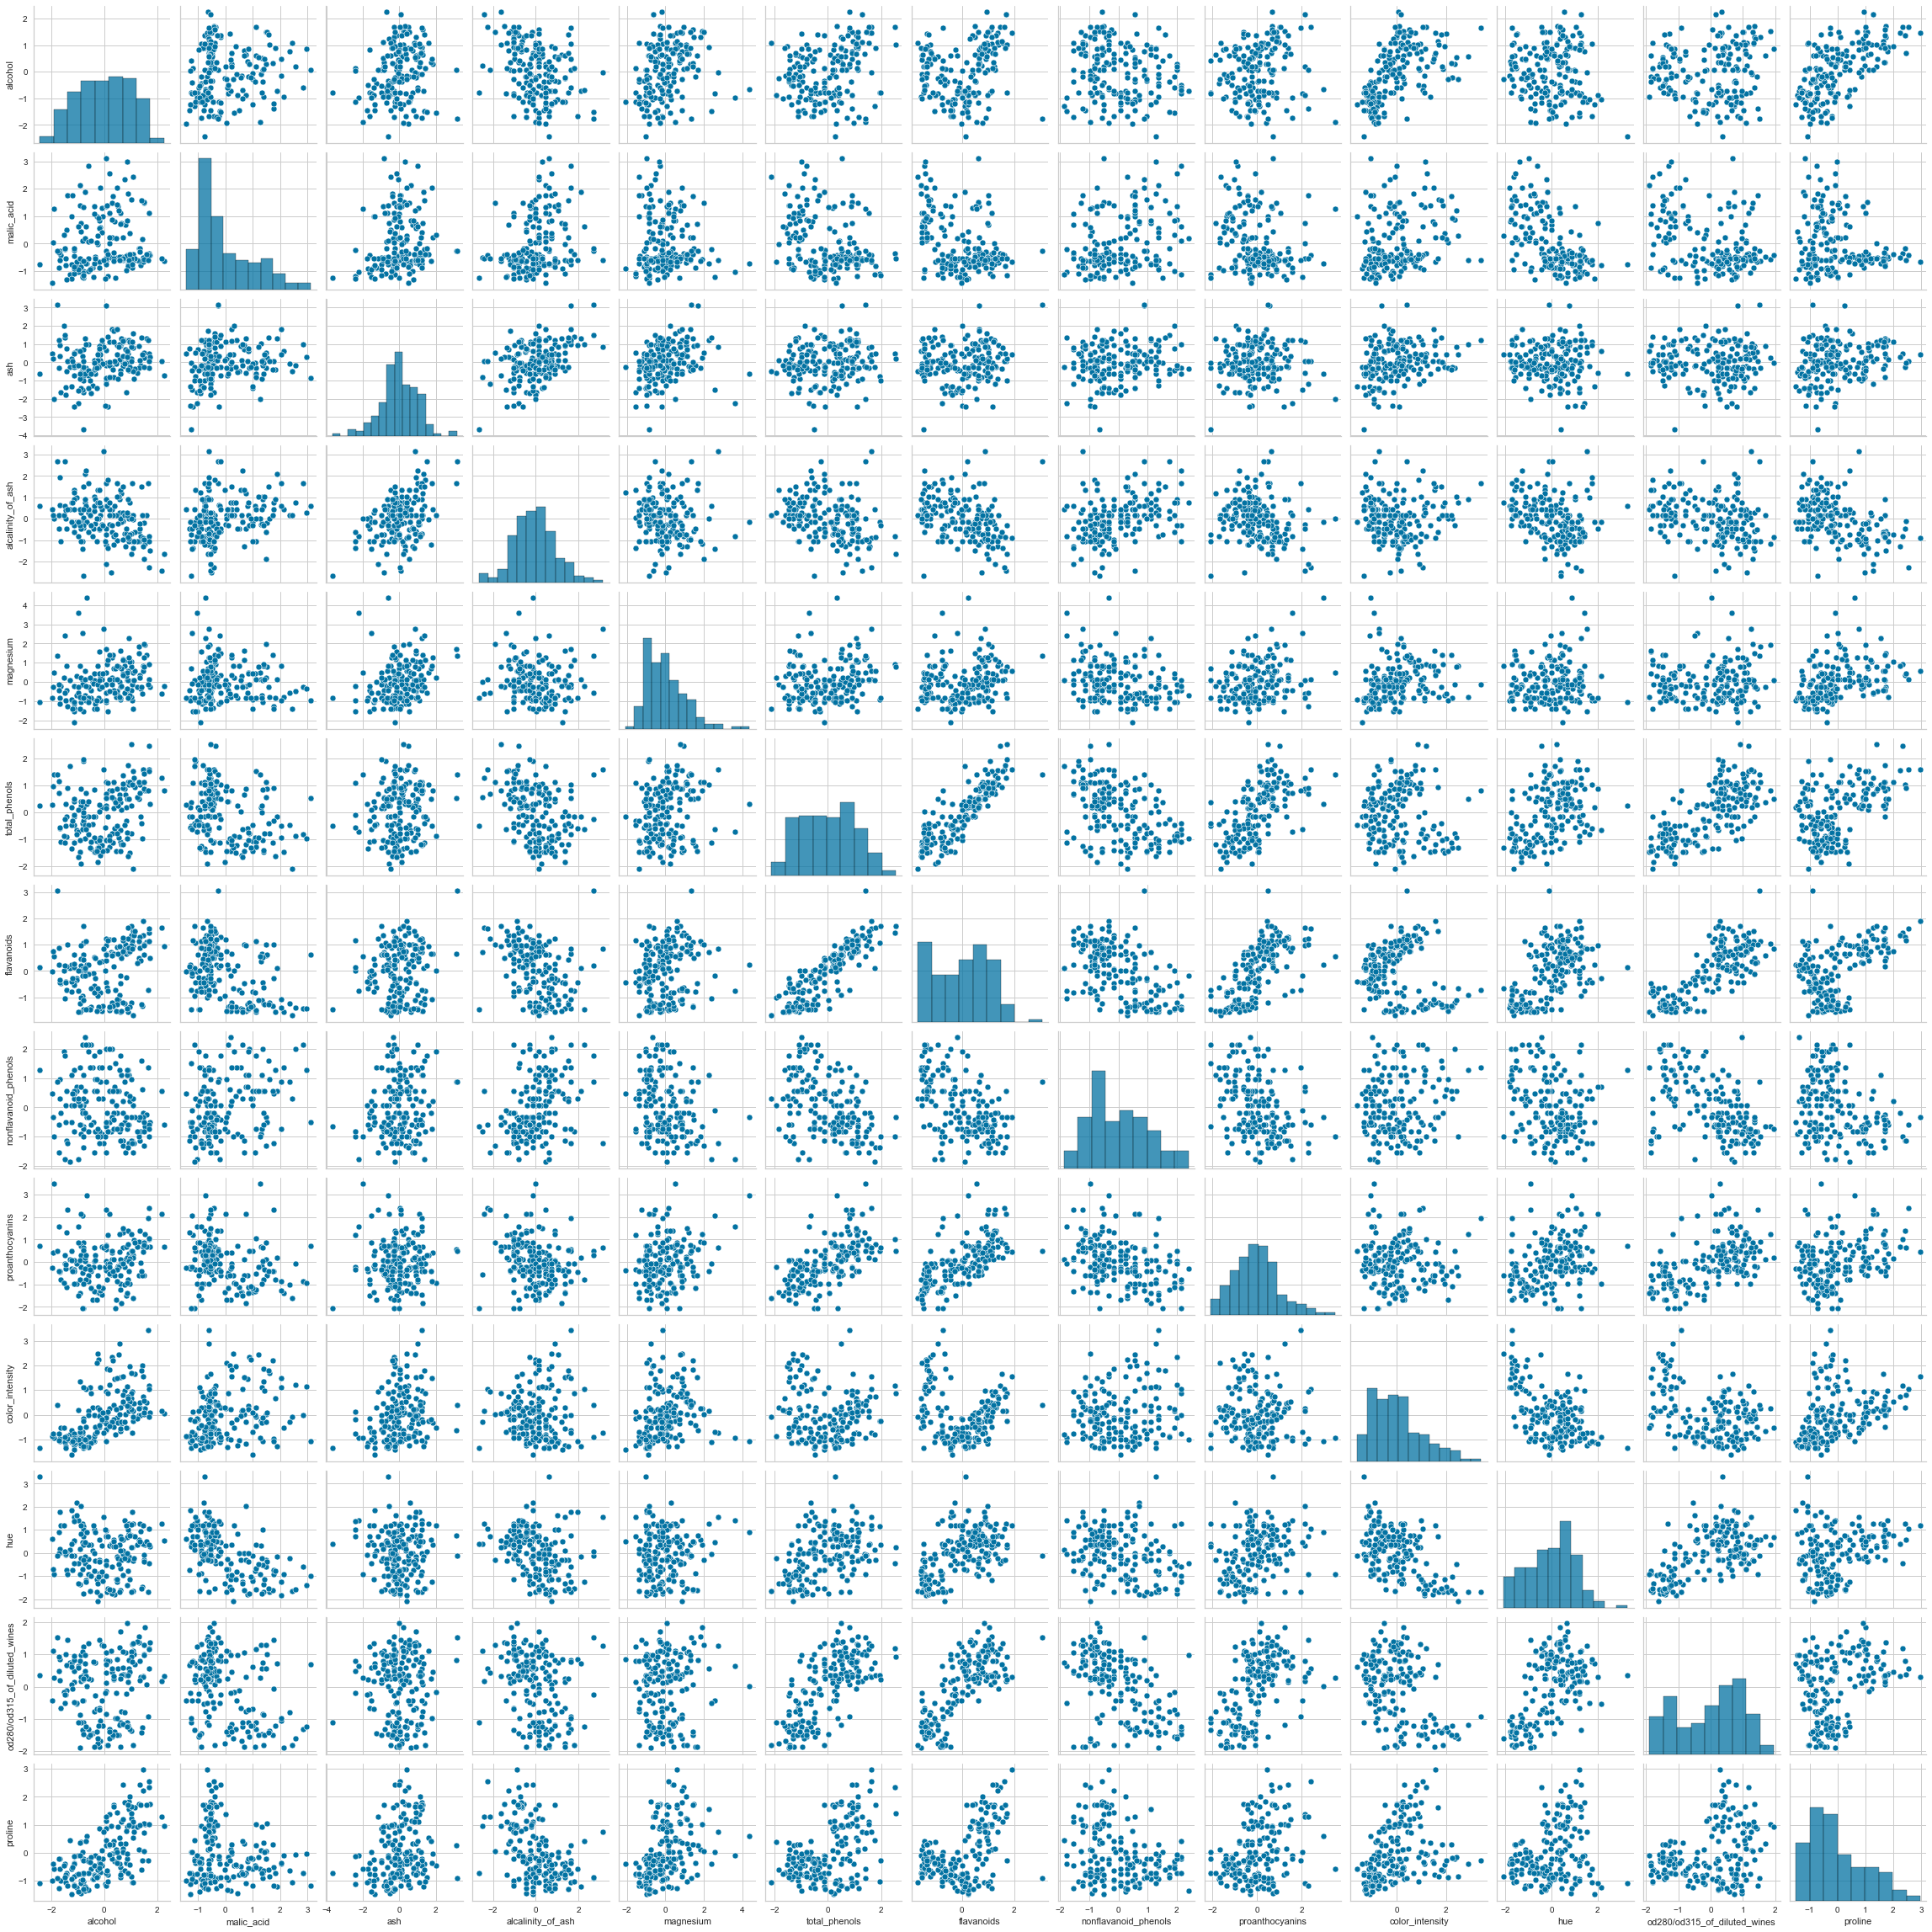

In [33]:
sns.pairplot(X_w)

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(2)


## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.